In [2]:
Task 5
Credit Card Fraud Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import dataset

In [3]:
path = 'creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f"Data Contains {df.shape[0]} credit cards, {df.shape[1]} Features.")

Data Contains 284807 credit cards, 31 Features.


In [6]:
print("Null Values:", sum(df.isna().sum()))

Null Values: 0


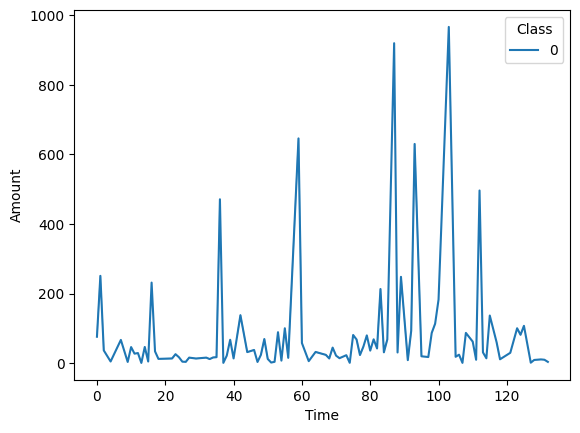

In [7]:
sns.lineplot(data=df[:200], x='Time', y='Amount', hue='Class', ci=0)
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64


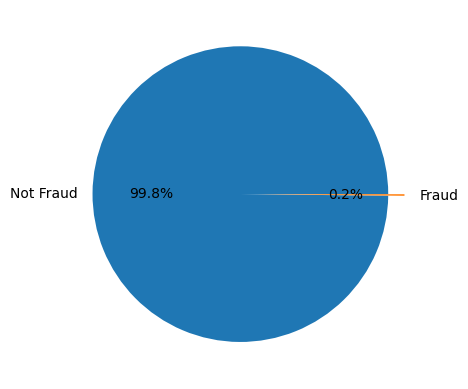

In [8]:
print(df['Class'].value_counts())
plt.pie(df['Class'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', explode=(.1, .01))
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [10]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']
print('The Shape of dataset X =',X.shape, 'y =',y.shape)

The Shape of dataset X = (284807, 30) y = (284807,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [13]:
lr = LogisticRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14220
           1       0.69      0.43      0.53        21

    accuracy                           1.00     14241
   macro avg       0.85      0.71      0.76     14241
weighted avg       1.00      1.00      1.00     14241



In [14]:
X, x_test_final, y, y_test_final = train_test_split(X, y, test_size=0.01, random_state=42)
print('Shape of test sample', x_test_final.shape)

Shape of test sample (2849, 30)


In [15]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X, y)
df_res = pd.concat([x_res, y_res])
y_res.value_counts()

Class
0    281468
1    281468
Name: count, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.05, random_state=42, stratify=y_res)

lr = LogisticRegression().fit(x_train, y_train)

print('The Shape of test samples')
print(x_test.shape, y_test.shape)

The Shape of test samples
(28147, 30) (28147,)


In [17]:
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14074
           1       0.97      0.92      0.95     14073

    accuracy                           0.95     28147
   macro avg       0.95      0.95      0.95     28147
weighted avg       0.95      0.95      0.95     28147



In [18]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(X, y)
df_res = pd.concat([x_res, y_res])
y_res.value_counts()

Class
0    281468
1    281468
Name: count, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.05, random_state=42, stratify=y_res)

lr = LogisticRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('The Shape of test samples',x_test.shape, y_test.shape)
print(classification_report(y_test, y_pred))

The Shape of test samples (28147, 30) (28147,)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14074
           1       0.98      0.92      0.95     14073

    accuracy                           0.95     28147
   macro avg       0.95      0.95      0.95     28147
weighted avg       0.95      0.95      0.95     28147



Getting better with this technique

**We will use this method..**

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [21]:
NN = Sequential([
    Dense(32, input_shape=(30, ), activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1554 (6.07 KB)
Trainable params: 1554 (6.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
NN.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
NN.fit(x_train, y_train, validation_split=0.05, batch_size=128, epochs=50, shuffle=True)

Epoch 1/50
3970/3970 [==============================] - 6s 1ms/step - loss: 0.0494 - accuracy: 0.9834 - val_loss: 0.0123 - val_accuracy: 0.9974
Epoch 2/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0069 - val_accuracy: 0.9987
Epoch 3/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 4/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 5/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 6/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 7/50
3970/3970 [==============================] - 5s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy:

In [24]:
NN_pred = np.argmax(NN.predict(x_test), axis=1)
print(classification_report(y_test, NN_pred))

880/880 [==============================] - 1s 992us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14074
           1       1.00      1.00      1.00     14073

    accuracy                           1.00     28147
   macro avg       1.00      1.00      1.00     28147
weighted avg       1.00      1.00      1.00     28147



90/90 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2847
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2849
   macro avg       1.00      1.00      1.00      2849
weighted avg       1.00      1.00      1.00      2849



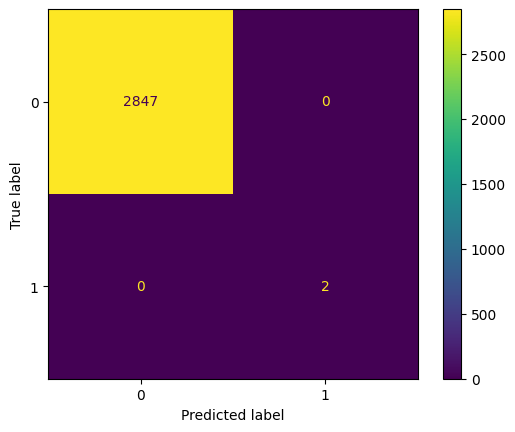

In [25]:
NN_pred = np.argmax(NN.predict(x_test_final), axis=1)
print(classification_report(y_test_final, NN_pred))

cm = confusion_matrix(y_test_final, NN_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()